# Generative Adversarial Network (GAN)
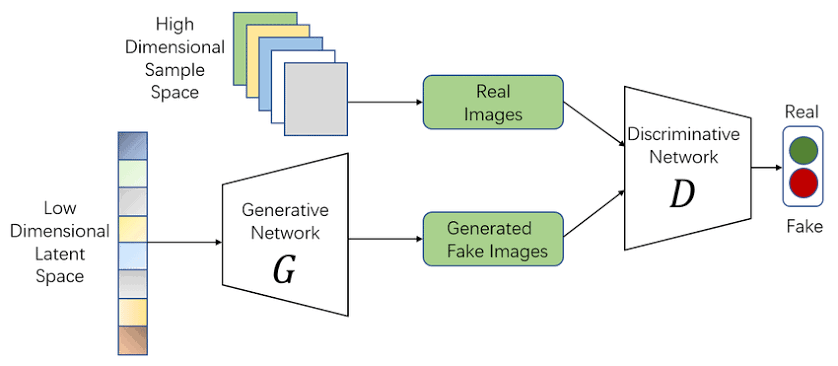

In a GAN, the generator creates fake images, and the discriminator judges whether images are real or fake. The generator’s goal is to "fool" the discriminator into thinking its fake images are real.

**The two models are like rivals in a game:**

When the discriminator is good at spotting fakes, the generator needs to improve a lot.

When the discriminator is confused by fakes, the generator doesn’t need to improve as much.



import libraries


In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D,Conv2DTranspose,Reshape
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
from numpy.random import rand


**Train on CIFAR_10 dataset**

consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [2]:
# Load data CIFAR_10
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


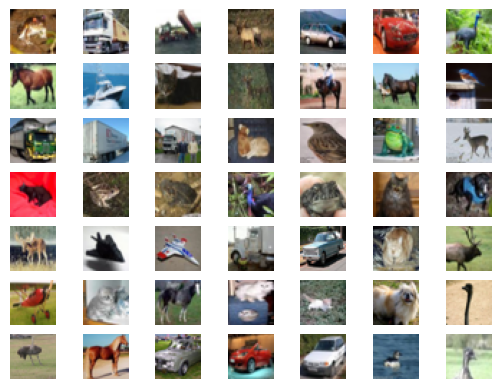

In [5]:
# plot samples from dataset
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.imshow(x_train[i])
    plt.axis("off")
plt.show()

In [6]:
# function for load samples from real data
def load_real_samples():
  (trainX, _), (_, _) = cifar10.load_data()
  X=trainX.astype("float32")
  X=(X-127.5)/127.5
  return X

In [7]:
# function for define real exmaples from dataset
def generate_real_samples(dataset,n_samples):
  ix=np.random.randint(0,dataset.shape[0],n_samples)
  X=dataset[ix]
  y=np.ones((n_samples,1))
  return X,y

In [8]:
# function for generate random samples
def generate_fake_img(n_samples):
  X=rand(32*32*3*n_samples)
  X=-1+X*2
  X=X.reshape((n_samples,64,64,3))
  y=np.zeros((n_samples,1))
  return X,y

**Define Discrimintor**

take real examples from dataset labeled as 1  and fake images labeled as 0 ,generated by function and train on this to classify between real and fake images

In [9]:
# Define Discriminator
def define_discriminator(in_sample=(32,32,3)):
  model=Sequential()

  model.add(Conv2D(64,(3,3),padding="same",input_shape=in_sample))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),strides=(2,2),padding="same"))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),strides=(2,2),padding="same"))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(256,(3,3),strides=(2,2),padding="same"))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation="sigmoid"))
  opt=Adam(learning_rate=0.0002,beta_1=0.5)
  model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
  return model



In [10]:
model=define_discriminator()
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,497 (1.99 MB)

 Trainable params: 522,497 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

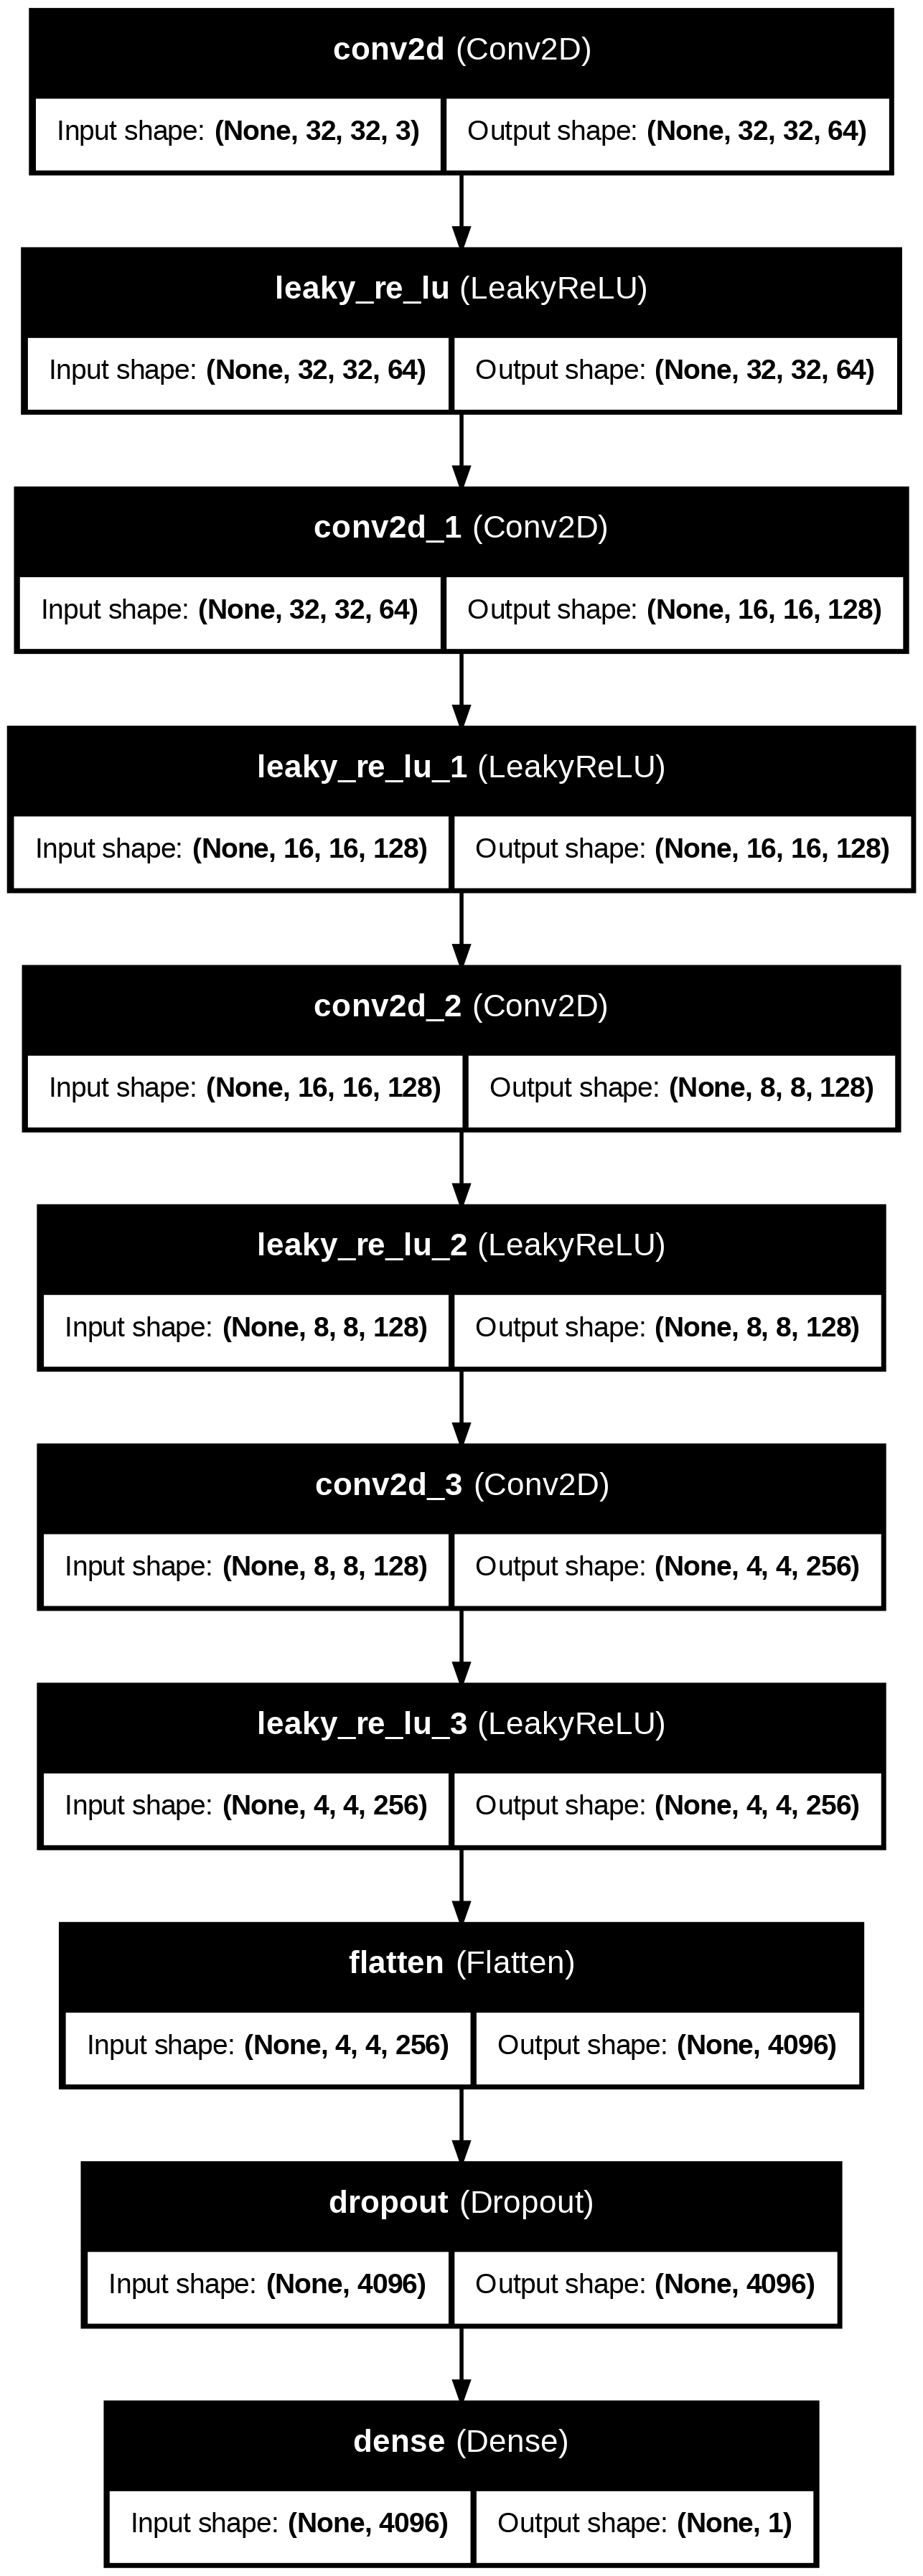

In [11]:
plot_model(model, to_file="discriminator.png", show_shapes=True, show_layer_names=True)

# define generator
generate images color (3d) do it using architecture with two main steps :

1) start with small size and low resolution
using dense layer to represent versions of images  
4*4 and apply feature maps 256
output for this step is 4*4*256
now ready to next step 3d .
2) scale up:
upsample images  to ( 32* 32) using conv2d transpose (reverse to conv2d)
with stride(2,2)
apply conv2d transpose until reach 32*32



**generator**

In [12]:
#define generator

def define_generator(latent_dim=100):
    model = Sequential()
    n_nodes = 4*4*256
    #start with dense layer
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4, 4, 256)))

    # upsample to 8*8
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # upsample to 16*16
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # upsample to 32*32
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Output 32x32x3
    model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))
    return model

In [13]:
latent_dim=100
model=define_generator(latent_dim)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 4096)           │       413,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# function for generate random latent space (random numbers from guassian distributaion)
def latent_space_rand(latent_dim,n_samples):
  X_input=rand(latent_dim * n_samples)
  X_input=X_input.reshape((n_samples,latent_dim))

  return X_input

In [ ]:
#function for generate random images using generator
def generate_fake_samples(g_model,latent_dim,n_samples):
  X_input=latent_space_rand(latent_dim,n_samples)
  X=g_model.predict(X_input)
  y=np.zeros((n_samples,1))
  return X,y

In [ ]:
# function for combined two model to train generator and update generator weights
def train_generator(g_model,d_model):
  #freeze discrimintor to update gen  model weights
  d_model.trainable=False
  model=Sequential()
  model.add(g_model)
  model.add(d_model)
  opt=Adam(learning_rate=0.0002,beta_1=0.5)
  model.compile(loss="binary_crossentropy",optimizer=opt)
  return model


In [ ]:
# Train generator
latent_dim=100
d_model=define_discriminator()
g_model=define_generator(latent_dim)
gan_model=train_generator(g_model,d_model)
gan_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 32, 32, 3)      │     1,256,067 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 1)              │       522,497 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,778,564 (6.78 MB)

 Trainable params: 1,239,299 (4.73 MB)

 Non-trainable params: 539,265 (2.06 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Streaming output truncated to the last 5000 lines.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
>4, 232/390, d1=4.707, d2=4.707 g=0.165
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
>4, 233/390, d1=4.708, d2=4.707 g=0.165
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
>4, 234/390, d1=4.708, d2=4.707 g=0.165
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
>4, 235/390, d1=4.708, d2=4.707 g=0.165
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
>4, 236/390, d1=4.708, d2=4.707 g=0.165
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
>4, 237/390, d1=4.708, d2=4.707 g=0.164
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
>4, 238/390, d1=4.708, d2=4.707 g=0.164
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
>4, 239/390, d1=4.708, d2=4.707 g=0.164
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
>4, 240/390, d1=4.708, d2=4.708 g=0.164
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
>4, 241/390, d1=4.709, d2=4.708 g=0.164
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
>4, 242/390, d1=4.709, d2=4.708 g=0.164
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
>4, 243/390, d1=4.709, d2=4.709 g=0.164
2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


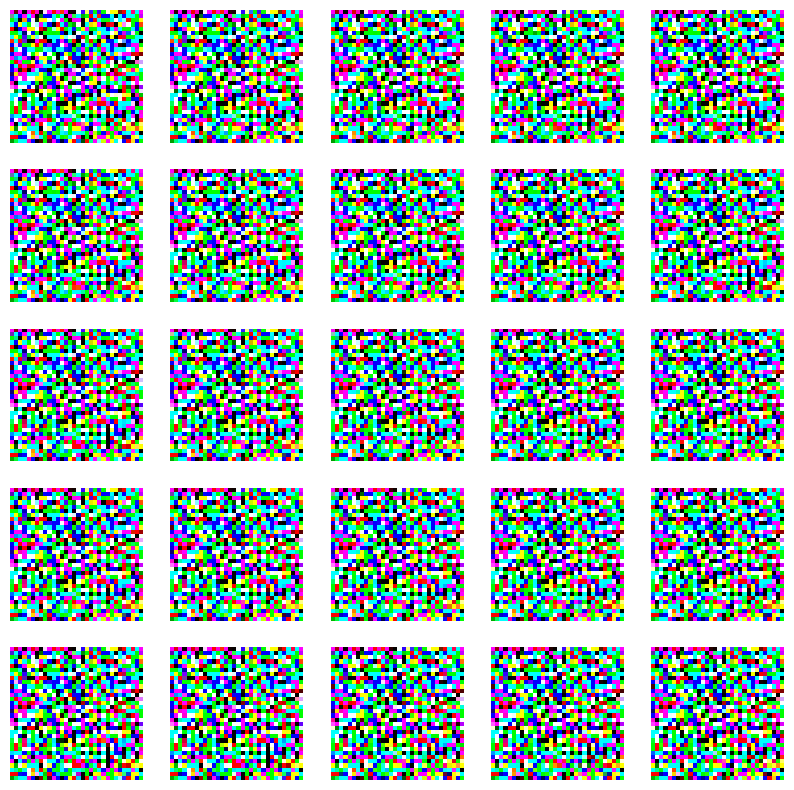

In [ ]:
# Training function for the GAN (Generator & Descrimintor )
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        for j in range(bat_per_epo):
            # Get real samples
            X_real, y_real = generate_real_samples(dataset, half_batch)

            # Generate fake samples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)

            # Train discriminator on real and fake
            d_loss1 = d_model.train_on_batch(X_real, y_real)[0]
            d_loss2 = d_model.train_on_batch(X_fake, y_fake)[0]

            # generate points in latent space as input for the generator
            X_gan = latent_space_rand(latent_dim, n_batch)
            y_gan = np.ones((n_batch, 1))

            # Update the generator via the discriminator error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)

            # Summarize loss on this batch
            print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' % (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))

        # Evaluate the model performance every 10 epochs
        if (i+1) % 10 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)

# Function to save generated images and model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
    # Prepare real samples
    X_real, y_real = generate_real_samples(dataset, n_samples)
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    # Prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    # Summarize discriminator performance
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

    # Save the generator model
    filename = 'generator_model_%03d.h5' % (epoch + 1)
    g_model.save(filename)


# Run models
latent_dim = 100
d_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model = train_generator(g_model, d_model)


# Train the GAN (use a smaller number of epochs for testing, e.g., 10)
train(g_model, d_model, gan_model, x_train, latent_dim, n_epochs=10, n_batch=128)

